In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
swiggy=pd.read_csv(r"swiggy_cleaned.csv")

In [3]:
swiggy.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138


# Data Preprocessing

In [4]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [5]:
swiggy.isnull().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day          0
distance                3630
dtype: int64

In [6]:
swiggy.dropna(inplace=True)

In [7]:
swiggy.isna().sum()

rider_id                0
age                     0
ratings                 0
restaurant_latitude     0
restaurant_longitude    0
delivery_latitude       0
delivery_longitude      0
order_date              0
weather                 0
traffic                 0
vehicle_condition       0
type_of_order           0
type_of_vehicle         0
multiple_deliveries     0
festival                0
city_type               0
time_taken              0
city_name               0
order_day               0
order_month             0
order_day_of_week       0
is_weekend              0
pickup_time_minutes     0
order_time_hour         0
order_time_of_day       0
distance                0
dtype: int64

In [8]:
swiggy.duplicated().sum()

np.int64(0)

# Outlier Detection


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
numerical = swiggy.select_dtypes(include = [int,float])

In [11]:
numerical.head()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition,multiple_deliveries,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,order_time_hour,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2,0.0,24,19,3,1,15.0,11.0,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2,1.0,33,25,3,0,5.0,19.0,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0,1.0,26,19,3,1,15.0,8.0,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1.0,21,5,4,0,10.0,18.0,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,1.0,30,26,3,1,15.0,13.0,6.210138


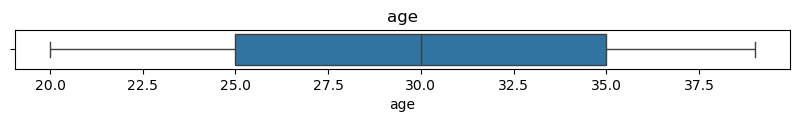

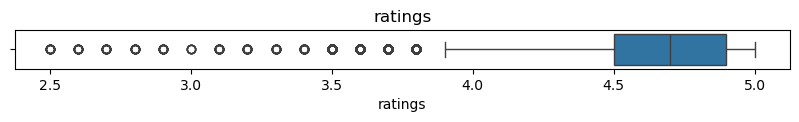

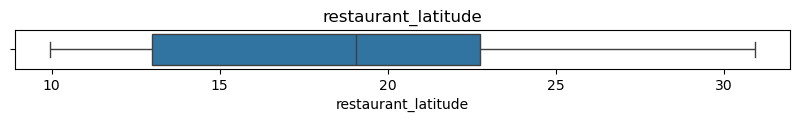

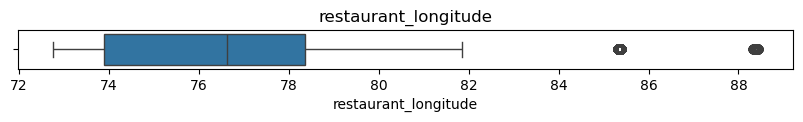

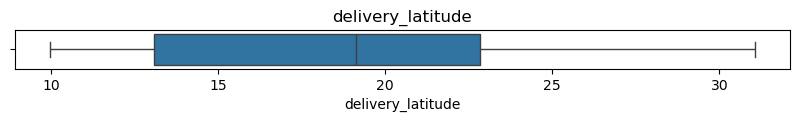

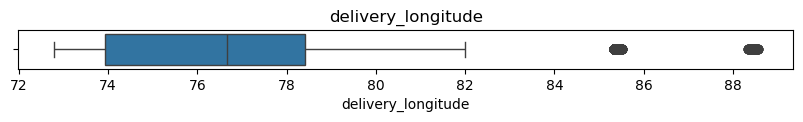

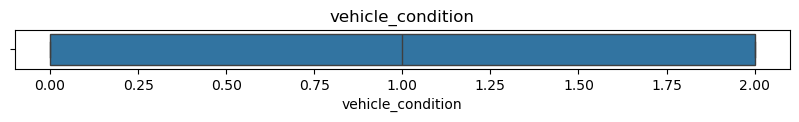

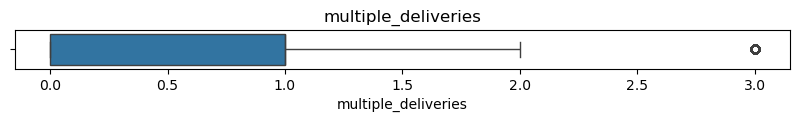

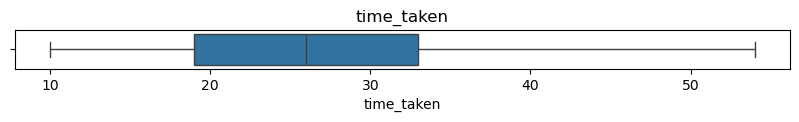

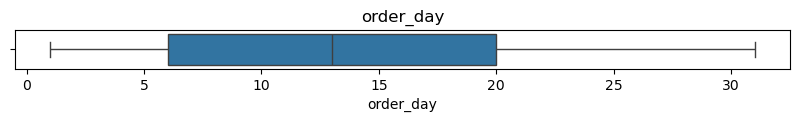

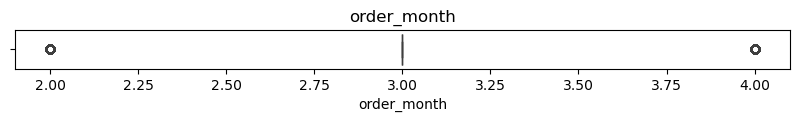

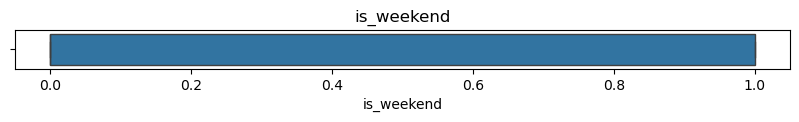

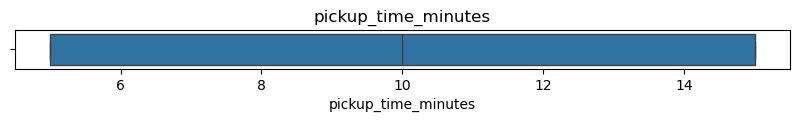

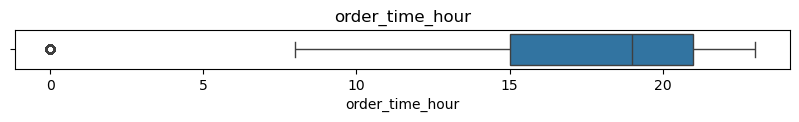

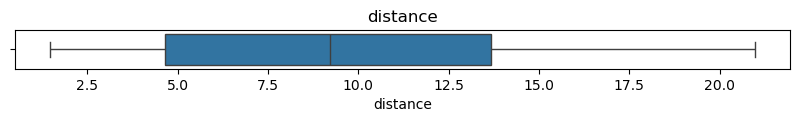

In [12]:
for i in numerical.columns:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=swiggy[i])
    plt.title(i)
    plt.show()

In [13]:
def outlier(d):
    q3 = d.quantile(0.75)
    q1 = d.quantile(0.25)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    return lb,ub

In [14]:
swiggy[numerical.columns].apply(outlier)

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition,multiple_deliveries,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,order_time_hour,distance
0,10.0,3.9,-1.661734,67.191473,-1.566722,67.241993,-3.0,-1.5,-2.0,-15.0,3.0,-1.5,-10.0,6.0,-8.877101
1,50.0,5.5,37.399014,85.075284,37.453995,85.104217,5.0,2.5,54.0,41.0,3.0,2.5,30.0,30.0,27.216526


In [15]:
swiggy['ratings'] = swiggy.ratings.clip(lower = 4.3,upper = 5.1)
swiggy['restaurant_longitude'] = swiggy.restaurant_longitude.clip(lower = 67.719259,upper = 84.242214)
swiggy['delivery_longitude'] = swiggy.delivery_longitude.clip(lower = 67.858174,upper = 84.253670)
swiggy['multiple_deliveries'] = swiggy.multiple_deliveries.clip(lower = -1.5,upper = 2.5)
swiggy['time_taken'] = swiggy.time_taken.clip(lower = -0.5,upper = 51.5)
swiggy['order_month'] = swiggy.order_month.clip(lower = 3.0,upper = 3.0)
swiggy['order_time_hour'] = swiggy.order_time_hour.clip(lower = 6.0,upper = 30.0)

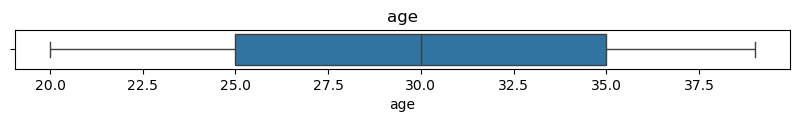

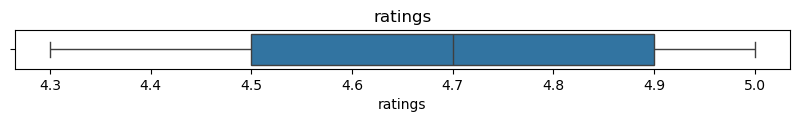

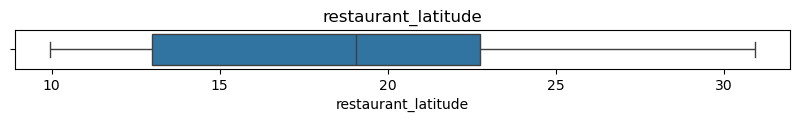

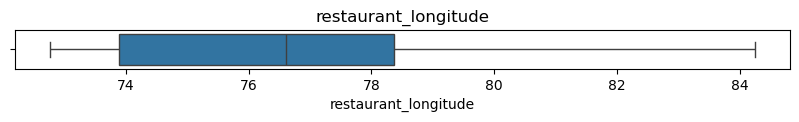

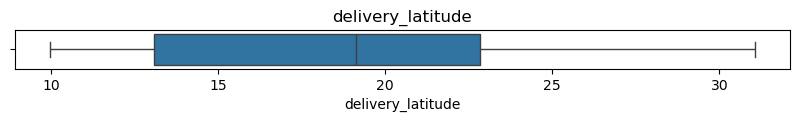

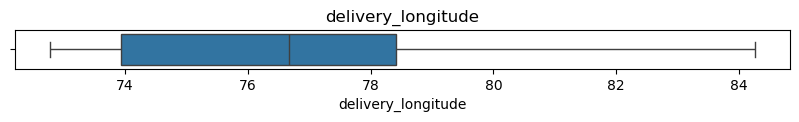

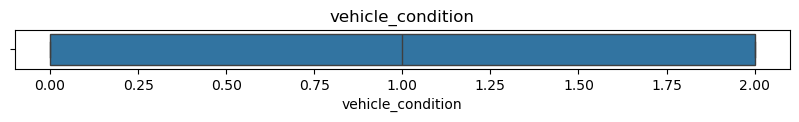

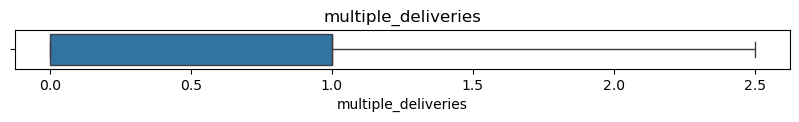

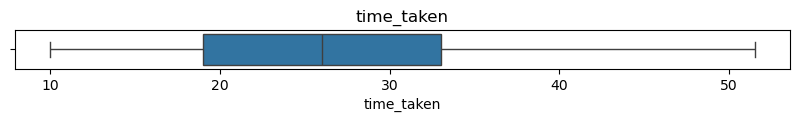

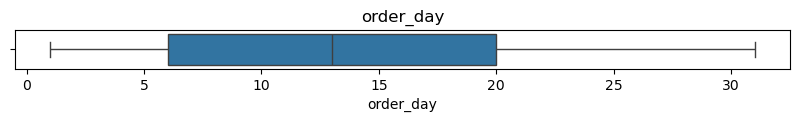

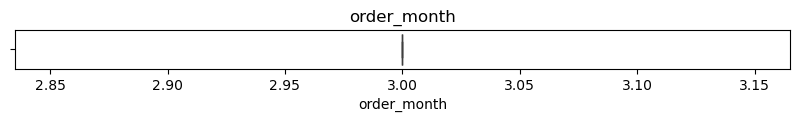

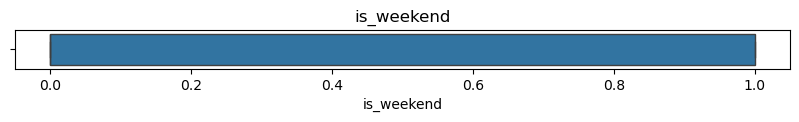

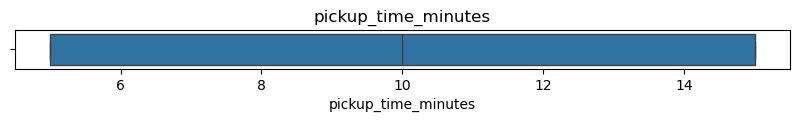

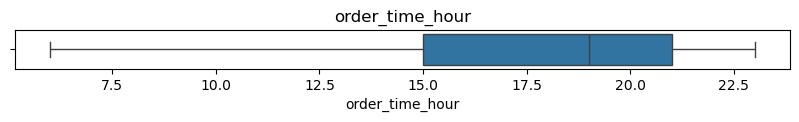

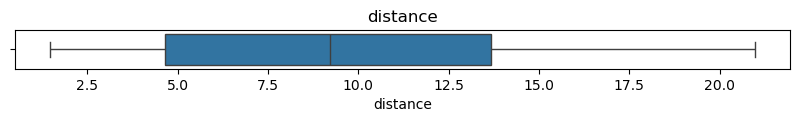

In [16]:
for i in numerical.columns:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=swiggy[i])
    plt.title(i)
    plt.show()

In [17]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38064 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              38064 non-null  object 
 1   age                   38064 non-null  float64
 2   ratings               38064 non-null  float64
 3   restaurant_latitude   38064 non-null  float64
 4   restaurant_longitude  38064 non-null  float64
 5   delivery_latitude     38064 non-null  float64
 6   delivery_longitude    38064 non-null  float64
 7   order_date            38064 non-null  object 
 8   weather               38064 non-null  object 
 9   traffic               38064 non-null  object 
 10  vehicle_condition     38064 non-null  int64  
 11  type_of_order         38064 non-null  object 
 12  type_of_vehicle       38064 non-null  object 
 13  multiple_deliveries   38064 non-null  float64
 14  festival              38064 non-null  object 
 15  city_type             38

In [18]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day"]

swiggy.drop(columns=columns_to_drop, inplace=True)

In [19]:
swiggy.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance'],
      dtype='object')

In [20]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type","city_name","order_month",
                    "order_day_of_week",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic"]

In [21]:
len(num_cols + nominal_cat_cols + ordinal_cat_cols)

15

In [23]:
swiggy['traffic'].unique()

array(['high', 'jam', 'low', 'medium'], dtype=object)

In [24]:
# generate order for ordinal encoding
traffic_order = ["low","medium","high","jam"]

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline 
# Chains multiple preprocessing and modeling steps into a single object.
from sklearn.compose import ColumnTransformer 
# Chains multiple preprocessing and modeling steps into a single object.

# Building pipeline

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(
        drop="first",
        handle_unknown="ignore",
        sparse_output=False
    ), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order]), ordinal_cat_cols)
],
    remainder="passthrough",
    n_jobs=-1,
    verbose_feature_names_out=False
)

# Set output as pandas DataFrame
preprocessor.set_output(transform="pandas")

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam']]),
                                 ['traffic'])],
                  verbose_feature_names_out=False)

In [61]:
swiggy.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance'],
      dtype='object')

In [64]:
a=['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'city_name', 'order_day_of_week', 'is_weekend',
       'pickup_time_minutes', 'order_time_hour', 'order_time_of_day',
       'distance']
b=['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance']


diff_a_not_in_b = [item for item in a if item not in b]
print("In a but not in b:", diff_a_not_in_b)

In a but not in b: ['order_time_hour']


In [63]:
processed_df = preprocessor.fit_transform(swiggy)

In [30]:
processed_df.head()

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_wednesday,is_weekend_1,order_time_of_day_afternoon,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,vehicle_condition,multiple_deliveries,time_taken
0,0.894737,0.857143,1.0,0.079986,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2,0.0,24.0
1,0.736842,0.285714,0.0,0.959704,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2,1.0,33.0
2,0.157895,0.142857,1.0,0.004496,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0,26.0
3,0.947368,0.571429,0.5,0.324303,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,21.0
4,0.631579,0.428571,1.0,0.243282,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1,1.0,30.0


# Splitting of Data

In [31]:
from sklearn.model_selection import train_test_split

# split into X and y

X = processed_df.drop(columns='time_taken')
y = processed_df['time_taken']

X

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_tuesday,order_day_of_week_wednesday,is_weekend_1,order_time_of_day_afternoon,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,vehicle_condition,multiple_deliveries
0,0.894737,0.857143,1.0,0.079986,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2,0.0
1,0.736842,0.285714,0.0,0.959704,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2,1.0
2,0.157895,0.142857,1.0,0.004496,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0
3,0.947368,0.571429,0.5,0.324303,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0
4,0.631579,0.428571,1.0,0.243282,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,0.789474,0.000000,0.5,0.775988,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2,1.0
45497,0.526316,0.714286,0.5,0.001270,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1,0.0
45499,0.526316,0.857143,1.0,0.163662,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0
45500,0.000000,0.571429,0.0,0.244423,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,1.0


In [60]:
X.columns

Index(['age', 'ratings', 'pickup_time_minutes', 'distance', 'weather_fog',
       'weather_sandstorms', 'weather_stormy', 'weather_sunny',
       'weather_windy', 'type_of_order_drinks', 'type_of_order_meal',
       'type_of_order_snack', 'type_of_vehicle_motorcycle',
       'type_of_vehicle_scooter', 'festival_yes', 'city_type_semi-urban',
       'city_type_urban', 'city_name_ALH', 'city_name_AURG', 'city_name_BANG',
       'city_name_BHP', 'city_name_CHEN', 'city_name_COIMB', 'city_name_DEH',
       'city_name_GOA', 'city_name_HYD', 'city_name_INDO', 'city_name_JAP',
       'city_name_KNP', 'city_name_KOC', 'city_name_KOL', 'city_name_LUDH',
       'city_name_MUM', 'city_name_MYS', 'city_name_PUNE', 'city_name_RANCHI',
       'city_name_SUR', 'city_name_VAD', 'order_day_of_week_monday',
       'order_day_of_week_saturday', 'order_day_of_week_sunday',
       'order_day_of_week_thursday', 'order_day_of_week_tuesday',
       'order_day_of_week_wednesday', 'is_weekend_1',
       'order_t

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30451, 52)
The shape of test data is (7613, 52)


In [ ]:
30451+7613

In [ ]:
38064

In [36]:
y_train.shape,y_test.shape

((30451,), (7613,))

# Model Building


# Model 1 Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [39]:
pred1_train=model.predict(X_train)
pred=model.predict(X_test)

In [40]:
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score

In [41]:
print('Training data mean squared error=',mean_squared_error(y_train,pred1_train))
print('Traing data root mean squared error=',root_mean_squared_error(y_train,pred1_train))
print('Training data R2 score',r2_score(y_train,pred1_train))
print()
print('mean squared error=',mean_squared_error(y_test,pred))
print('root mean squared error=',root_mean_squared_error(y_test,pred))
print('R2 score',r2_score(y_test,pred))

Training data mean squared error= 36.53864711023145
Traing data root mean squared error= 6.0447205981940515
Training data R2 score 0.5773563708106332

mean squared error= 37.52663859185259
root mean squared error= 6.1258990027466655
R2 score 0.5690532556239666


# Model 2 DecisionTreeRegressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(criterion='squared_error')

In [43]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
pred2_train=dt_model.predict(X_train)
pred2=dt_model.predict(X_test)

In [45]:
print('Training data mean squared error=',mean_squared_error(y_train,pred2_train))
print('Traing data root mean squared error=',root_mean_squared_error(y_train,pred2_train))
print('Training data R2 score',r2_score(y_train,pred2_train))
print()
print('mean squared error=',mean_squared_error(y_test,pred2))
print('root mean squared error=',root_mean_squared_error(y_test,pred2))
print('R2 score',r2_score(y_test,pred2))

Training data mean squared error= 0.0
Traing data root mean squared error= 0.0
Training data R2 score 1.0

mean squared error= 28.24415473532116
root mean squared error= 5.314523001673919
R2 score 0.6756510311722355


# Model 3 RandomForestRegressor


In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
randomforest_model=RandomForestRegressor(n_estimators=50)

In [48]:
randomforest_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [50]:
pred3_train=model.predict(X_train)
pred3=randomforest_model.predict(X_test)

In [51]:
print('Training data mean squared error=',mean_squared_error(y_train,pred3_train))
print('Traing data root mean squared error=',root_mean_squared_error(y_train,pred3_train))
print('Training data R2 score',r2_score(y_train,pred3_train))
print()
print('mean squared error=',mean_squared_error(y_test,pred3))
print('root mean squared error=',root_mean_squared_error(y_test,pred3))
print('R2 score',r2_score(y_test,pred3))

Training data mean squared error= 36.53864711023145
Traing data root mean squared error= 6.0447205981940515
Training data R2 score 0.5773563708106332

mean squared error= 15.340539721528964
root mean squared error= 3.916700106151729
R2 score 0.8238329917617659


In [ ]:
! pip install xgboost

# Model 4 XGBoostRegressor


In [52]:
from xgboost import XGBRegressor

In [53]:
model=XGBRegressor(n_estimator=100,learning_rate=0.1)

In [54]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=100,
             n_estimators=None, n_jobs=None, ...)

In [56]:
pred4_train=model.predict(X_train)
pred4=model.predict(X_test)

In [57]:
print('Training data mean squared error=',mean_squared_error(y_train,pred4_train))
print('Traing data root mean squared error=',root_mean_squared_error(y_train,pred4_train))
print('Training data R2 score',r2_score(y_train,pred4_train))
print()
print('mean squared error=',mean_squared_error(y_test,pred4))
print('root mean squared error=',root_mean_squared_error(y_test,pred4))
print('R2 score',r2_score(y_test,pred4))

Training data mean squared error= 13.31688138803831
Traing data root mean squared error= 3.649230245961237
Training data R2 score 0.8459632327834923

mean squared error= 15.037351825855533
root mean squared error= 3.877802448018147
R2 score 0.8273147274428043


In [58]:
import pickle

In [59]:
with open('model.pkl','wb') as file:
  pickle.dump(model,file)